## Исследование данных и подбор параметров классификатора

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns = None
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings('ignore')

## Airline Passenger Satisfaction
**What factors lead to customer satisfaction for an Airline?**  
https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

### Context
This dataset contains an airline passenger satisfaction survey.

### Content
*Gender*: Gender of the passengers (Female, Male)  
*Customer Type*: The customer type (Loyal customer, disloyal customer)  
*Age*: The actual age of the passengers  
*Type of Travel*: Purpose of the flight of the passengers (Personal Travel, Business Travel)  
*Class*: Travel class in the plane of the passengers (Business, Eco, Eco Plus)  
*Flight distance*: The flight distance of this journey  
*Inflight wifi service*: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)  
*Departure/Arrival time convenient*: Satisfaction level of Departure/Arrival time convenient  
*Ease of Online booking*: Satisfaction level of online booking  
*Gate location*: Satisfaction level of Gate location  
*Food and drink*: Satisfaction level of Food and drink  
*Online boarding*: Satisfaction level of online boarding  
*Seat comfort*: Satisfaction level of Seat comfort  
*Inflight entertainment*: Satisfaction level of inflight entertainment  
*On-board service*: Satisfaction level of On-board service  
*Leg room service*: Satisfaction level of Leg room service  
*Baggage handling*: Satisfaction level of baggage handling  
*Check-in service*: Satisfaction level of Check-in service  
*Inflight service*: Satisfaction level of inflight service  
*Cleanliness*: Satisfaction level of Cleanliness  
*Departure Delay in Minutes*: Minutes delayed when departure  
*Arrival Delay in Minutes*: Minutes delayed when Arrival  
*Satisfaction*: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### Загрузка и обзор тренировочного датасета

In [2]:
train_df = pd.read_csv("./datasets/train.csv", index_col=0)
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
train_df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [5]:
train_df.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

Классы целевой переменной достаточно сбалансированы

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

### Обработка и отбор признаков

In [7]:
# Пропущенные значения
train_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Заполняю пропущенные значения признака "Arrival Delay in Minutes" модой

In [8]:
arrival_delay_mode = train_df['Arrival Delay in Minutes'].mode()[0]
train_df.loc[train_df['Arrival Delay in Minutes'].isnull(), 
             'Arrival Delay in Minutes'] = arrival_delay_mode

In [9]:
train_df['Arrival Delay in Minutes'].isna().value_counts()

False    103904
Name: Arrival Delay in Minutes, dtype: int64

Заменяю значения целевой переменной на 0 и 1

In [10]:
train_df.satisfaction = np.where(train_df.satisfaction == 'satisfied', 1, 0)
train_df.satisfaction.value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [11]:
for col in train_df.columns[1:]:
    print(f'{col}\n{train_df[col].value_counts()}')
    print('*' * 30)

Gender
Female    52727
Male      51177
Name: Gender, dtype: int64
******************************
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
******************************
Age
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
******************************
Type of Travel
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
******************************
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
******************************
Flight Distance
337     660
594     395
404     392
2475    369
862     369
       ... 
1466      1
856       1
810       1
1361      1
3763      1
Name: Flight Distance, Length: 3802, dtype: int64
******************************
Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Infligh

In [26]:
cont_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
ordered_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 
                    'Ease of Online booking', 'Gate location', 'Food and drink',
                    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                    'On-board service', 'Leg room service', 'Baggage handling', 
                    'Checkin service', 'Inflight service', 'Cleanliness']
target = ['satisfaction']

Матрица корреляции

<AxesSubplot:>

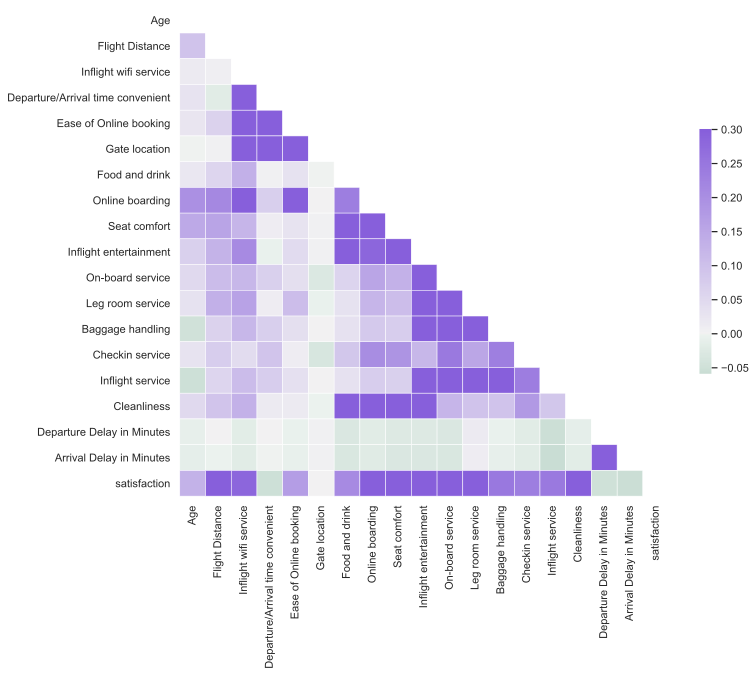

In [27]:
# Compute the correlation matrix
df_corr = train_df.iloc[:, 1:].corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
df_corr.satisfaction.sort_values()

Arrival Delay in Minutes            -0.057435
Departure/Arrival time convenient   -0.051601
Departure Delay in Minutes          -0.050494
Gate location                        0.000682
Age                                  0.129184
Ease of Online booking               0.171705
Food and drink                       0.209936
Checkin service                      0.236174
Inflight service                     0.244741
Baggage handling                     0.247749
Inflight wifi service                0.284245
Flight Distance                      0.298780
Cleanliness                          0.305198
Leg room service                     0.313131
On-board service                     0.322383
Seat comfort                         0.349459
Inflight entertainment               0.398059
Online boarding                      0.503557
satisfaction                         1.000000
Name: satisfaction, dtype: float64

Признаки, у который коэффициент корреляции меньше 0.1 по модулю, не буду использовать в модели

In [29]:
ordered_features.remove('Gate location')
ordered_features.remove('Departure/Arrival time convenient')

In [21]:
features_to_drop = ['satisfaction', 'id', 'Gate location', 'Departure/Arrival time convenient',
                   'Departure Delay in Minutes', 'Arrival Delay in Minutes']

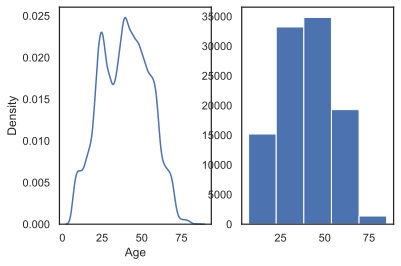

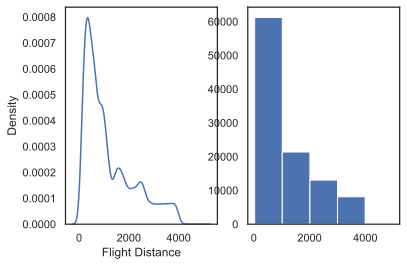

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

for column in cont_features[:2]:
    plt.subplot(1,2,1)
    sns.kdeplot(train_df[column])
    plt.subplot(1,2,2)
    plt.hist(train_df[column], bins=5)
    plt.show()

Применяю к признаку "Age" преобразование QuantileTransformer

In [23]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')

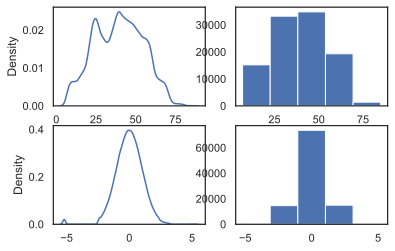

In [24]:
dq =qt.fit_transform(train_df['Age'].values.reshape(-1,1))
plt.subplot(2,2,1)
sns.kdeplot(train_df['Age'].values)
plt.subplot(2,2,2)
plt.hist(train_df['Age'], bins=5)
plt.subplot(2,2,3)
sns.kdeplot(dq[:,0])
plt.subplot(2,2,4)
plt.hist(dq, bins=5)
plt.show()

In [25]:
train_df['Age'] = qt.fit_transform(train_df['Age'].values.reshape(-1,1))

In [30]:
# Добавляю дамми переменные
train_df = pd.get_dummies(data=train_df, columns=cat_features)
train_df.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,70172,-1.744448,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,1,1,0,0,1,0,0,1
1,5047,-0.826698,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,0,1,1,0,1,0,0
2,110028,-0.743040,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,1,0,1,0,1,0,0
3,24026,-0.826698,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,1,0,1,0,1,0,0
4,119299,1.456896,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,1,1,0,1,0,1,0,0


Стандартизирую признак "Flight Distance"

In [2]:
from sklearn.preprocessing import StandardScaler

In [32]:
standard = StandardScaler()

In [33]:
std_cols = standard.fit_transform(train_df[[cont_features[1]]])
std_cols[0]

array([-0.73153876])

In [34]:
train_df['Flight Distance'] = std_cols[:, 0]
train_df.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,70172,-1.744448,-0.731539,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,1,1,0,0,1,0,0,1
1,5047,-0.826698,-0.957184,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,0,1,1,0,1,0,0
2,110028,-0.743040,-0.047584,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,1,0,1,0,1,0,0
3,24026,-0.826698,-0.629246,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,1,0,1,0,1,0,0
4,119299,1.456896,-0.978244,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,1,1,0,1,0,1,0,0


Разбиваю датасет на X и y. Оставляю в X только признаки с коэффициентом корреляции более 0.1

In [35]:
X = train_df.drop(features_to_drop, axis=1)
y = train_df[target]

Разбиваю тестовый датасет на тестовую и валидационную выборки

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True)

In [38]:
X_train.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
95749,0.879040,2.608004,3,3,5,4,5,1,1,2,1,4,1,4,0,1,1,0,1,0,1,0,0
51295,-0.171458,-0.444719,2,2,2,2,2,2,2,2,3,3,4,2,1,0,0,1,1,0,0,1,0
11678,-0.618059,-0.472799,1,1,1,1,1,1,3,3,1,5,3,1,1,0,1,0,0,1,0,1,0
47765,-0.280911,-0.180965,5,5,2,4,5,4,4,4,4,3,4,5,0,1,1,0,1,0,1,0,0
83341,-0.280911,-0.876954,5,5,4,4,5,4,4,4,4,5,4,5,0,1,1,0,1,0,1,0,0


In [39]:
X_train.shape

(72732, 23)

### Подбор гиперпараметров
Использую XGBClassifier в качестве классификатора

In [40]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [41]:
xgb_cls = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=27)

In [42]:
params={'n_estimators':[100, 150, 200, 250],
        'learning_rate':[0.1, 0.05, 0.01],
        'max_depth':[3, 5, 7, 10]
        }

In [43]:
%%time
grid = GridSearchCV(xgb_cls,
                    param_grid=params,
                    cv=7,
                    refit=False)

search = grid.fit(X_train, y_train)

Wall time: 13min 18s


In [44]:
search.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}

In [45]:
search.best_score_

0.9631936557648072

### Обучение модели классификатора

In [46]:
xgb_cls = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=27,
            learning_rate=0.05, max_depth=10, n_estimators=200)

In [47]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [48]:
valid_preds = xgb_cls.predict(X_valid)

In [49]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

In [50]:
print(f'Valid roc_auc_score: {roc_auc_score(y_valid, valid_preds)}')

Valid roc_auc_score: 0.9594000465611808


In [51]:
valid_proba = xgb_cls.predict_proba(X_valid)[:, 1]
valid_proba[:10]

array([0.00026643, 0.45285353, 0.9992155 , 0.9993249 , 0.00043769,
       0.00236805, 0.9996232 , 0.9936619 , 0.00060295, 0.9977203 ],
      dtype=float32)

Строю матрицу ошибок и определяю оптимальный порог

In [52]:
precision, recall, thresholds = precision_recall_curve(y_valid, valid_proba)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.484706, F-Score=0.956, Precision=0.973, Recall=0.940


In [53]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17246   359]
 [  814 12753]]


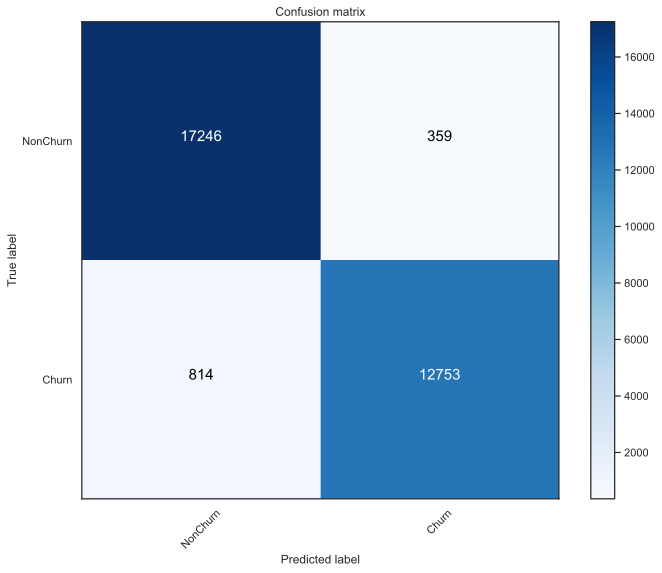

In [54]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_valid, valid_proba>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

### Важность признаков

In [55]:
xgb_coefs = pd.DataFrame(xgb_cls.feature_importances_, 
                        X_train.columns.to_list(), 
                        columns=['coefficient'])
xgb_coefs.head()

,coefficient
Age,0.005436
Flight Distance,0.003056
Inflight wifi service,0.123370
Ease of Online booking,0.010563
Food and drink,0.003659


In [56]:
xgb_coefs.sort_values(by='coefficient', ascending=False)

,coefficient
Online boarding,0.408202
Type of Travel_Business travel,0.211816
Inflight wifi service,0.123370
Customer Type_Loyal Customer,0.053910
Inflight entertainment,0.042582
Class_Business,0.037388
Checkin service,0.020056
Cleanliness,0.013381
Seat comfort,0.013343
Leg room service,0.012905


In [57]:
xgb_coefs.loc[xgb_coefs.coefficient == 0]

,coefficient
Gender_Male,0.0
Customer Type_disloyal Customer,0.0
Type of Travel_Personal Travel,0.0


Отбираю 20 наиболее важных признаков для обучения финальной модели

In [58]:
from sklearn.feature_selection import SelectKBest

In [59]:
kbest = SelectKBest(k=20)

In [60]:
kbest.fit(X_train, y_train)

SelectKBest(k=20)

In [61]:
X_train_new = kbest.transform(X_train)

In [62]:
X_train_new.shape

(72732, 20)

In [63]:
xgb_cls.fit(X_train_new, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [64]:
X_valid_new = kbest.transform(X_valid)

In [65]:
valid_preds_new = xgb_cls.predict(X_valid_new)

In [66]:
roc_auc_score(y_valid, valid_preds_new)

0.9590991301189902

При сборке пайплайна применю следующие трансформации к признакам:
* Flight Distance - стандартизация
* Age - QuantileTransformer
* 'Gender', 'Customer Type', 'Type of Travel', 'Class' - One Hot Encoding
* 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',  'Checkin service', 'Inflight service', 'Cleanliness' - оставляю без изменения
* 'id', 'Gate location', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes' - не использую в обучении пайплайна